In [31]:
import pandas as pd
import numpy  as np 
import seaborn  as sns
import  matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold , StratifiedKFold , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


In [32]:
df = pd.read_csv("../final_df.csv")   
df_2 = pd.read_csv("../Final_df_2.csv")

In [33]:
df

,CustomerID,purchase_flag,morning,afternoon,evening,night,is_weekend,StockCode,Country,Recency,Frequency,Monetary
0,12346.0,0,1.000000,0.000000,0.000000,0.0,0.000000,411.195599,20.861862,1.648698,-1.188394,3.124567
1,12347.0,1,0.252747,0.747253,0.000000,0.0,0.000000,21.792060,23.681319,-1.811238,1.225580,1.379011
2,12348.0,1,0.354839,0.096774,0.548387,0.0,0.096774,24.018406,32.913985,0.277955,0.771619,0.755331
3,12349.0,1,1.000000,0.000000,0.000000,0.0,0.000000,26.878190,23.064960,-0.686657,-1.188394,0.738768
4,12350.0,1,0.000000,1.000000,0.000000,0.0,0.000000,18.246066,33.767918,1.594997,-1.188394,-0.587242
...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,1,1.000000,0.000000,0.000000,0.0,0.000000,27.211809,20.861862,1.480503,-1.188394,-1.129895
4334,18281.0,1,1.000000,0.000000,0.000000,0.0,1.000000,24.736962,20.861862,1.052248,-1.188394,-1.880768
4335,18282.0,1,0.416667,0.583333,0.000000,0.0,0.000000,33.698998,20.861862,-1.174995,-0.051452,-1.142755
4336,18283.0,1,0.124827,0.769764,0.105409,0.0,0.061026,19.921757,20.861862,-1.513320,1.595703,0.850669


In [34]:
df_2.columns

Index(['Unnamed: 0', 'InvoiceNo', 'StockCode', 'Description', 'Quantity',
       'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country', 'date', 'hour',
       'weekday', 'is_weekend', 'total_price', 'time_diff', 'new_session',
       'session_id', 'morning', 'afternoon', 'evening', 'night',
       'purchase_flag', 'Recency', 'Frequency', 'Monetary'],
      dtype='object')

In [35]:
df_2.drop(columns=['Unnamed: 0' , 'InvoiceNo','Description','Quantity','InvoiceDate','UnitPrice'
                   ,'date', 'hour','weekday','total_price','time_diff', 'new_session','session_id'
                   ] , inplace=True)

In [36]:
df_2

,StockCode,CustomerID,Country,is_weekend,morning,afternoon,evening,night,purchase_flag,Recency,Frequency,Monetary
0,411.195599,12346.0,20.861862,0,1,0,0,0,0,2.053822,-1.800572,1.939115
1,19.081541,12347.0,23.681319,0,0,1,0,0,1,-1.290948,0.095209,0.340498
2,10.873593,12347.0,23.681319,0,0,1,0,0,1,-1.290948,0.095209,0.340498
3,75.342932,12347.0,23.681319,0,0,1,0,0,1,-1.290948,0.095209,0.340498
4,49.351508,12347.0,23.681319,0,0,1,0,0,1,-1.290948,0.095209,0.340498
...,...,...,...,...,...,...,...,...,...,...,...,...
392687,7.607047,18287.0,20.861862,0,1,0,0,0,1,0.696023,-0.742756,-0.248710
392688,25.216240,18287.0,20.861862,0,1,0,0,0,1,0.696023,-0.742756,-0.248710
392689,9.078409,18287.0,20.861862,0,1,0,0,0,1,0.696023,-0.742756,-0.248710
392690,9.228641,18287.0,20.861862,0,1,0,0,0,1,0.696023,-0.742756,-0.248710


### split data

In [37]:
X_regression = df.drop(columns=['purchase_flag', 'CustomerID','Monetary'])
y_regression = df["Monetary"]


X_classification = df.drop(columns=['purchase_flag', 'CustomerID'])
y_classification = df['purchase_flag']

X2_regression = df_2.drop(columns=['purchase_flag', 'CustomerID','Monetary'])
y2_regression = df_2["Monetary"]


X2_classification = df_2.drop(columns=['purchase_flag', 'CustomerID'])
y2_classification = df_2['purchase_flag']



In [38]:
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.metrics import precision_recall_curve, roc_auc_score

### lightgbm

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X_classification, y_classification, test_size=0.2, random_state=42)


In [ ]:
model_lgb = lgb.LGBMClassifier(objective='binary', num_leaves=31, learning_rate=0.05, n_estimators=100)
model_lgb.fit(X_train, y_train, categorical_feature=['StockCode', 'Country'])  


[LightGBM] [Info] Number of positive: 3407, number of negative: 63
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000367 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1416
[LightGBM] [Info] Number of data points in the train set: 3470, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.981844 -> initscore=3.990453
[LightGBM] [Info] Start training from score 3.990453
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,100
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


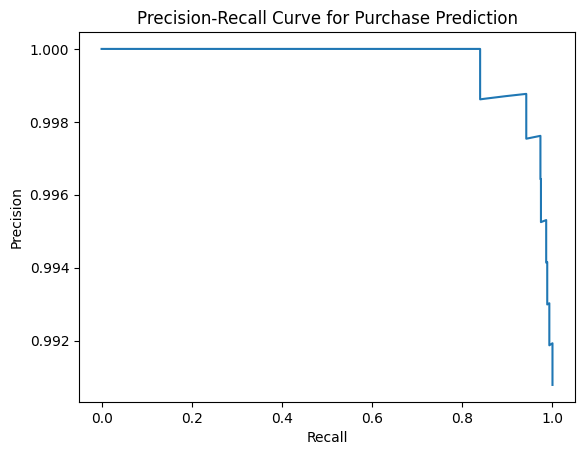

In [41]:
y_pred_proba = model_lgb.predict_proba(X_test)[:, 1]

precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Purchase Prediction')
plt.show()

###  lightgbm accuracy

In [42]:
accuracy = accuracy_score(y_test, model_lgb.predict(X_test))
print(f"Accuracy: {accuracy}")

auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")


Accuracy: 0.9861751152073732
AUC: 0.9620639534883721


### RF model

In [43]:
cv = KFold(n_splits= 5 ,shuffle=True, random_state=42)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
scores = cross_val_score(rf_model, X_regression, y_regression, cv=cv, scoring='neg_mean_squared_error')
rmse_scores = np.sqrt(-scores)
print(f"RMSE for each fold: {rmse_scores}")
print(f"Mean RMSE across folds: {rmse_scores.mean()}")


RMSE for each fold: [0.60690796 0.67952316 0.62032919 0.60057181 0.70010345]
Mean RMSE across folds: 0.6414871149629746


### Plotting the feature importance for RF

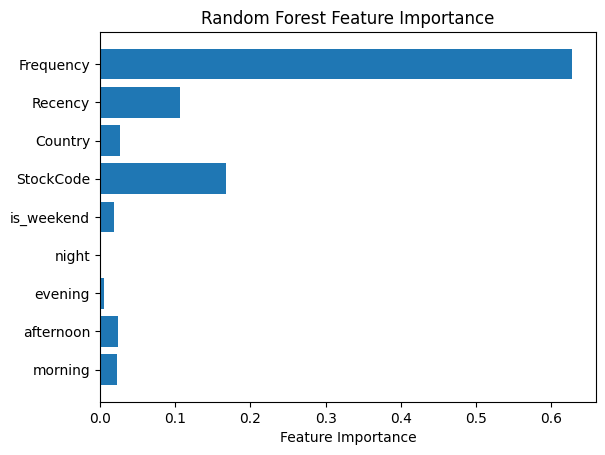

In [44]:
rf_model.fit(X_regression, y_regression) 
feature_importance = rf_model.feature_importances_

# Plotting the feature importance
plt.barh(X_regression.columns, feature_importance)
plt.xlabel('Feature Importance')
plt.title('Random Forest Feature Importance')
plt.show()

### XGboost model

In [45]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, accuracy_score


In [46]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)
params = {
    'objective': 'reg:squarederror', 
    'max_depth': 6,
    'learning_rate': 0.1,
    'eval_metric': 'rmse', 
    'early_stopping_rounds': 10 
}

In [47]:
evals = [(dtrain, 'train'), (dtest, 'eval')]

model = xgb.train(params, dtrain, num_boost_round=500, evals=evals, early_stopping_rounds=10)


[0]	train-rmse:0.12698	eval-rmse:0.09389


[1]	train-rmse:0.12103	eval-rmse:0.09197
[2]	train-rmse:0.11558	eval-rmse:0.09047
[3]	train-rmse:0.11071	eval-rmse:0.08934
[4]	train-rmse:0.10646	eval-rmse:0.08894
[5]	train-rmse:0.10263	eval-rmse:0.08871
[6]	train-rmse:0.09899	eval-rmse:0.08887
[7]	train-rmse:0.09593	eval-rmse:0.08898
[8]	train-rmse:0.09299	eval-rmse:0.08886
[9]	train-rmse:0.09058	eval-rmse:0.08962
[10]	train-rmse:0.08821	eval-rmse:0.09060
[11]	train-rmse:0.08609	eval-rmse:0.09070
[12]	train-rmse:0.08442	eval-rmse:0.09152
[13]	train-rmse:0.08240	eval-rmse:0.09190
[14]	train-rmse:0.08077	eval-rmse:0.09242
[15]	train-rmse:0.07932	eval-rmse:0.09280


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\callback.py:386: UserWarning: [21:26:25] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "early_stopping_rounds" } are not used.

  self.starting_round = model.num_boosted_rounds()


### XGboost accuracy

In [ ]:
y_pred = model.predict(dtest)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE: {rmse}")


RMSE: 0.09279951933596792


### Plotting the feature importance for XGboost

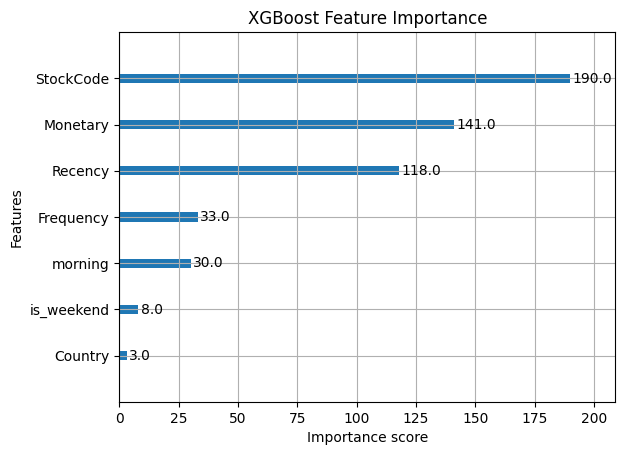

In [49]:
xgb.plot_importance(model)
plt.title('XGBoost Feature Importance')
plt.show()
